In [13]:
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

In [5]:
t_end=6200
n=100

In [6]:
t_eval=np.linspace(0,t_end,n)

In [7]:
y = 1-0.5*np.exp(-0.2*t_eval)-0.5*np.exp(-0.4*t_eval)

In [8]:
def dxdt(t,x,k1,k2):
    return [-k1*x[0],k1*x[0]-k2*x[1],k2*x[1]]

In [9]:
def model(t,k1,k2):
    res=solve_ivp(dxdt, [0,t_end], [1,0,0],t_eval=t_eval,args=(k1,k2))
    return res.y[2]

In [10]:
popt, pcov = curve_fit(model, t_eval, y, bounds=[(-307/t_end,-307/t_end),(308/t_end,308/t_end)])

In [17]:
# estimated parameters, k1 & k2
popt

array([0.04967742, 0.04967742])

In [18]:
# evaluate result
res=solve_ivp(dxdt, [0,t_end], [1,0,0],t_eval=t_eval,args=(popt[0],popt[1]))

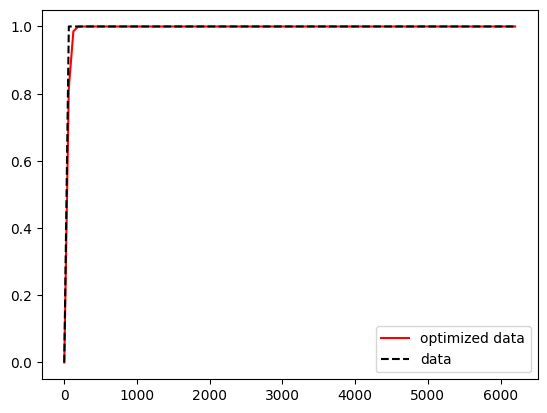

array([0.04967742, 0.04967742])

In [19]:
plt.plot(t_eval,res.y[2],'r', label="optimized data")
plt.plot(t_eval,y,'k--',label="data")
plt.legend()
plt.show()
popt